In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # For linear regression model
from sklearn.metrics import mean_squared_error, r2_score 

In [51]:
bike_daily_data = pd.read_csv('/Users/enzowurtele/Desktop/dataBases/CBS_2021-2023_Daily_Weather.csv', sep=',')

In [52]:
bike_daily_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Casual                          1095 non-null   int64  
 1   Date                            1095 non-null   object 
 2   Member                          1095 non-null   int64  
 3   Total_rides                     1095 non-null   int64  
 4   apparent_temperature_mean (°C)  1095 non-null   float64
 5   temperature_2m_mean (°C)        1095 non-null   float64
 6   weathercode (wmo code)          1095 non-null   int64  
 7   windspeed_10m_max (km/h)        1095 non-null   float64
dtypes: float64(3), int64(4), object(1)
memory usage: 68.6+ KB


In [53]:
def feel(temp):
    if temp >= 30:
        return 'Hot'
    elif 20 <= temp < 30:
        return 'Warm'
    elif 10 <= temp < 20:
        return 'Temperate'
    elif 0 <= temp < 10:
        return 'Cool'
    elif -10 <= temp < 0:
        return 'Cold'
    else: 
        return 'Freezing'

bike_daily_data['feels'] = bike_daily_data['apparent_temperature_mean (°C)'].apply(feel)

In [54]:
bike_daily_data['Date'] = pd.to_datetime(bike_daily_data['Date'])

In [55]:
def year(date):
    get_year = date.year

    if get_year == 2021:
        return '2021'
    elif get_year == 2022:
        return '2022'
    elif get_year == 2023:
        return '2023'

bike_daily_data['year'] = bike_daily_data['Date'].apply(year)

In [56]:
bike_daily_data.head()

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),feels,year
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,Cold,2021
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,Cool,2021
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,Cool,2021
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,Cool,2021
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,Cool,2021


In [57]:
bike_daily_data['day_of_week'] = bike_daily_data['Date'].dt.dayofweek

days = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

bike_daily_data['day_of_week'] = bike_daily_data['day_of_week'].map(days)

In [58]:
def get_season(Date):
    month = Date.month
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    elif month in [9, 10, 11]:
        return 'fall'

bike_daily_data['season'] = bike_daily_data['Date'].apply(get_season)

In [59]:
bike_daily_data.head()

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),feels,year,day_of_week,season
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,Cold,2021,Friday,winter
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,Cool,2021,Saturday,winter
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,Cool,2021,Sunday,winter
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,Cool,2021,Monday,winter
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,Cool,2021,Tuesday,winter


In [60]:
weather = {
0:	'Clear sky',
1:	'Mainly clear',
2:	'Partly cloudy',
3:	'Overcast',
51: 'Light drizzle',
53: 'Moderate drizzle',
55: 'Dense drizzle',
61: 'Slight rain',
63: 'Moderate rain',
65: 'Heavy rain',
71: 'Slight snow fall',
73: 'Moderate snow fall',
75: 'Heavy snow fall'
}

bike_daily_data['weather'] = bike_daily_data['weathercode (wmo code)'].map(weather)

In [61]:
bike_daily_data = pd.get_dummies(bike_daily_data)

In [62]:
bike_daily_data = bike_daily_data.drop(columns='Date')

In [74]:
pd.set_option('display.max_columns', None)

In [75]:
bike_daily_data.head()

,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),feels_Cold,feels_Cool,feels_Freezing,feels_Hot,feels_Temperate,feels_Warm,year_2021,year_2022,year_2023,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,season_fall,season_spring,season_summer,season_winter,weather_Clear sky,weather_Dense drizzle,weather_Heavy rain,weather_Heavy snow fall,weather_Light drizzle,weather_Mainly clear,weather_Moderate drizzle,weather_Moderate rain,weather_Moderate snow fall,weather_Overcast,weather_Partly cloudy,weather_Slight rain,weather_Slight snow fall
0,961,-0.9,2.3,63,10.6,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False
1,5718,4.8,7.6,61,19.1,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
2,1628,0.9,3.9,63,13.0,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False
3,2981,1.0,4.1,3,13.3,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False
4,3061,1.4,4.0,51,9.2,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False


In [64]:
bike_daily_data = bike_daily_data.drop(columns=['Casual','Member'])

In [65]:
X = bike_daily_data.drop(columns='Total_rides')
y = bike_daily_data['Total_rides']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [67]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 876 entries, 724 to 219
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   apparent_temperature_mean (°C)  876 non-null    float64
 1   temperature_2m_mean (°C)        876 non-null    float64
 2   weathercode (wmo code)          876 non-null    int64  
 3   windspeed_10m_max (km/h)        876 non-null    float64
 4   feels_Cold                      876 non-null    bool   
 5   feels_Cool                      876 non-null    bool   
 6   feels_Freezing                  876 non-null    bool   
 7   feels_Hot                       876 non-null    bool   
 8   feels_Temperate                 876 non-null    bool   
 9   feels_Warm                      876 non-null    bool   
 10  year_2021                       876 non-null    bool   
 11  year_2022                       876 non-null    bool   
 12  year_2023                       876 non

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [69]:
ride_pred = LinearRegression()
ride_pred.fit(X_train, y_train)

LinearRegression()

In [70]:
y_pred = ride_pred.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 3830392.015958525
R-squared: 0.7782828004469434


In [71]:
#44287
#0.7436

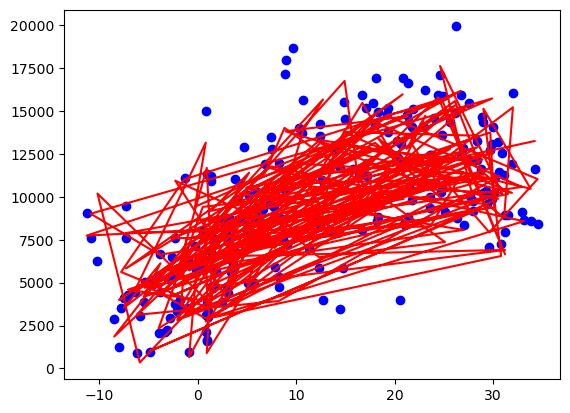

In [76]:

plt.scatter(X_test.iloc[:, 0], y_test, color='blue', label='Actual Data')
plt.plot(X_test.iloc[:, 0], y_pred, color='red', label='Regression Line')



In [77]:
print(len(X_test))  # Check length of X_test
print(len(y_test))  # Check length of y_test
print(len(y_pred))  # Check length of y_pred (after prediction)


219
219
219
